# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.225452e+01     7.650567e+00
 * time: 0.004583835601806641
     1     3.130545e+01     5.820558e+00
 * time: 0.022671937942504883
     2     2.415955e+01     7.165341e+00
 * time: 0.04484200477600098
     3     1.179982e+01     1.960599e+00
 * time: 0.06909394264221191
     4     1.116912e+01     2.339581e+00
 * time: 0.0848839282989502
     5     1.058895e+01     1.812194e+00
 * time: 0.10158801078796387
     6     1.009131e+01     1.251693e+00
 * time: 0.11831998825073242
     7     9.522940e+00     1.427460e+00
 * time: 0.1345670223236084
     8     9.026265e+00     1.067163e+00
 * time: 0.15034890174865723
     9     8.695956e+00     5.867542e-01
 * time: 0.16698884963989258
    10     8.505917e+00     3.752862e-01
 * time: 0.18404388427734375
    11     8.505012e+00     9.162077e-01
 * time: 0.19676804542541504
    12     8.475990e+00     9.695786e-01
 * time: 0.20987987518310547
    13     8.453220e+00     1.190345e+00
 * time:

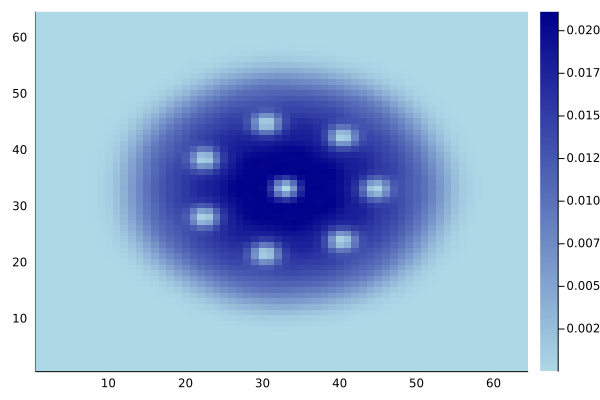

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)